In [ ]:
1.	This analysis examines the performance of user acquisition channels, monetization patterns, and retention metrics across different networks, countries, and platforms to optimize future UA spend and improve game monetization. 

In [ ]:
#!pip install  pandas_profiling

In [ ]:
#pip install ydata-profiling

In [ ]:
#!pip install ipywidgets --upgrade

In [ ]:
#!pip install --upgrade numba

In [14]:
#IMPORT THE DIFFERENT LIBRARIES
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.offline as po
import plotly.graph_objs as go
%matplotlib inline
import ydata_profiling
from datetime import datetime

In [2]:
import ydata_profiling
from ydata_profiling import ProfileReport

In [7]:
#Importing the data
# Specify the path to your file
file_path =  r"C:\Users\lenovo\Desktop\Carry1st Assessment\Sample Data_.csv"
# Load the data into a DataFrame
df = pd.read_csv(file_path)
# Display the first few rows of the data
df.head(2)

,App,MONTH,PLATFORM,NETWORK,COUNTRY,UA_SPEND,UA_IMPRESSIONS,UA_CLICKS,INSTALLS,NON_COHORTED_AD_REVENUE,...,AD_REVENUE_D30,AD_REVENUE_COHORTED,NON_COHORTED_IAP_REVENUE,IAP_REVENUE_D1,IAP_REVENUE_D7,IAP_REVENUE_D30,IAP_REVENUE_COHORTED,RETAINED_USERS_D1,RETAINED_USERS_D7,RETAINED_USERS_D30
0,Sample product,07/01/2024,ANDROID,APPLOVIN,RU,4184.3581,200767,84856,7393,2354.1255,...,1413.668114,1511.589664,0.0,0.0,0.0,0.0,0.0,1465,308,86
1,Sample product,07/01/2024,ANDROID,ADJOE,MU,37.5000,563,297,126,15.5924,...,14.014294,14.387375,0.0,0.0,0.0,0.0,0.0,25,4,1


In [8]:
# Generate the profile report
#profile = ProfileReport(data, title="YData Profiling Report")
# Display the report in Jupyter Notebook
#profile.to_notebook_iframe()

In [15]:
# Cell 3: Basic Data Overview
print("Dataset Overview:")
print("-" * 50)
print(f"Number of records: {len(df)}")
print("\nData Types:")
print(df.dtypes)

Dataset Overview:
--------------------------------------------------
Number of records: 3461

Data Types:
App                                 object
MONTH                       datetime64[ns]
PLATFORM                            object
NETWORK                             object
COUNTRY                             object
UA_SPEND                           float64
UA_IMPRESSIONS                       int64
UA_CLICKS                            int64
INSTALLS                             int64
NON_COHORTED_AD_REVENUE            float64
AD_REVENUE_D1                      float64
AD_REVENUE_D7                      float64
AD_REVENUE_D30                     float64
AD_REVENUE_COHORTED                float64
NON_COHORTED_IAP_REVENUE           float64
IAP_REVENUE_D1                     float64
IAP_REVENUE_D7                     float64
IAP_REVENUE_D30                    float64
IAP_REVENUE_COHORTED               float64
RETAINED_USERS_D1                    int64
RETAINED_USERS_D7                 

In [9]:
# Number of Columns and Rows in the Dataset
df.shape

(3461, 22)

In [18]:
# Cell 4: Data Quality Check
def check_data_quality(df):
    quality_report = pd.DataFrame({
        'Missing Values': df.isnull().sum(),
        'Missing Percentage': (df.isnull().sum() / len(df) * 100).round(2),
        'Unique Values': df.nunique(),
        'Data Type': df.dtypes
    })
    return quality_report

display(check_data_quality(df))

,Missing Values,Missing Percentage,Unique Values,Data Type
App,0,0.00,1,object
MONTH,0,0.00,3,datetime64[ns]
PLATFORM,0,0.00,2,object
NETWORK,0,0.00,19,object
COUNTRY,12,0.35,229,object
UA_SPEND,0,0.00,506,float64
UA_IMPRESSIONS,0,0.00,568,int64
UA_CLICKS,0,0.00,485,int64
INSTALLS,0,0.00,478,int64
NON_COHORTED_AD_REVENUE,0,0.00,2597,float64


In [16]:
# Convert the 'MONTH' column to datetime format for time-series analysis
df['MONTH'] = pd.to_datetime(data['MONTH'])


In [17]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,MONTH,UA_SPEND,UA_IMPRESSIONS,UA_CLICKS,INSTALLS,NON_COHORTED_AD_REVENUE,AD_REVENUE_D1,AD_REVENUE_D7,AD_REVENUE_D30,AD_REVENUE_COHORTED,NON_COHORTED_IAP_REVENUE,IAP_REVENUE_D1,IAP_REVENUE_D7,IAP_REVENUE_D30,IAP_REVENUE_COHORTED,RETAINED_USERS_D1,RETAINED_USERS_D7,RETAINED_USERS_D30
count,3461,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000
mean,2024-06-30 17:05:35.972262400,101.934544,3288.986998,1190.898584,150.514591,60.144071,30.481281,39.306553,46.235577,50.418498,1.483882,0.365280,0.618838,0.783392,0.860864,37.127420,7.552730,1.855822
min,2024-06-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024-06-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2024-07-01 00:00:00,0.000000,0.000000,0.000000,1.000000,0.331900,0.001775,0.002149,0.002439,0.003000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2024-08-01 00:00:00,0.000000,0.000000,0.000000,15.000000,7.181200,1.042917,1.383320,1.660394,1.764924,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000
max,2024-08-01 00:00:00,23368.000000,714026.000000,403893.000000,22770.000000,9847.774100,7177.408708,8870.778547,9582.833033,9830.405925,994.861845,158.961730,272.641495,436.671605,555.303385,4589.000000,940.000000,291.000000
std,NaN,920.715089,27448.613245,12522.037783,827.992718,442.148103,259.908883,329.852298,380.103517,410.355409,23.178017,4.450944,7.588155,10.178557,11.874019,196.234028,40.636133,11.383020


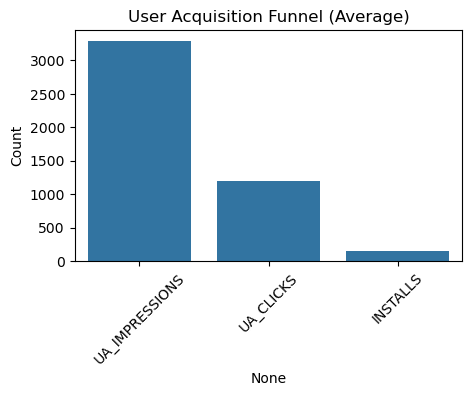

In [21]:
# Cell 5: User Acquisition Analysis
# UA Funnel
plt.figure(figsize=(5, 3))
df_funnel = df[['UA_IMPRESSIONS', 'UA_CLICKS', 'INSTALLS']].mean()
sns.barplot(x=df_funnel.index, y=df_funnel.values)
plt.title('User Acquisition Funnel (Average)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [43]:
# Calculate Conversion Rates with handling for zero values
ctr = (df['UA_CLICKS'] / df['UA_IMPRESSIONS'].replace(0, pd.NA) * 100).mean()
cvr = (df['INSTALLS'] / df['UA_CLICKS'].replace(0, pd.NA) * 100).mean()
cpi = (df['UA_SPEND'] / df['INSTALLS'].replace(0, pd.NA) * 100).mean()  # Corrected from itr to cpi

# Create the DataFrame for displaying metrics
conversion_metrics = pd.DataFrame({
    'Metric': ['CTR', 'CVR', 'CPI'],
    'Value': [ctr, cvr, cpi]
})

print("\nConversion Metrics:")
display(conversion_metrics)



Conversion Metrics:


,Metric,Value
0,CTR,72.858733
1,CVR,35.988051
2,CPI,18.415867


In [42]:
# Conversion Rates
#The issue with inf (infinity) values in your output indicates that there might be divisions by zero in your calculations. 
#This can happen if any of the values in UA_IMPRESSIONS, UA_CLICKS, or INSTALLS columns are zero.
#Here's how you can handle this in your code:

#Check for zero values: Avoid divisions by zero by replacing zero values with NaN temporarily for the calculations.
ctr = (df['UA_CLICKS'] / df['UA_IMPRESSIONS'] * 100).mean()
cvr = (df['INSTALLS'] / df['UA_CLICKS'] * 100).mean()
cpi = (df['UA_SPEND'] / df['INSTALLS']*100).mean()

conversion_metrics = pd.DataFrame({
    'Metric': ['CTR', 'CVR', 'CPI'],
    'Value': [ctr, cvr, itr]
})
print("\nConversion Metrics:")
display(conversion_metrics)


Conversion Metrics:


,Metric,Value
0,CTR,inf
1,CVR,inf
2,CPI,inf


In [ ]:
# Calculate total revenue (Ad + IAP)
    df['TOTAL_REVENUE_NONCOHORTED'] = df['NON_COHORTED_AD_REVENUE'] + df['NON_COHORTED_IAP_REVENUE']
    df['ARPU'] = df['TOTAL_REVENUE_COHORTED'] / df['INSTALLS']
    df['ROI'] = (df['TOTAL_REVENUE_COHORTED'] - df['UA_SPEND']) / df['UA_SPEND']
    

In [46]:
# Calculate metrics for each record
df['TOTAL_REVENUE_NON_COHORTED'] = df['NON_COHORTED_AD_REVENUE'] + df['NON_COHORTED_IAP_REVENUE']
df['ARPU'] = df['TOTAL_REVENUE_NON_COHORTED'] / df['INSTALLS']
df['ROI'] = (df['TOTAL_REVENUE_NON_COHORTED'] - df['UA_SPEND']) / df['UA_SPEND']

# Calculate the summary metrics
total_revenue_noncohorted = df['TOTAL_REVENUE_NON_COHORTED'].sum()
average_arpu = df['ARPU'].mean()
average_roi = df['ROI'].mean()

# Create a summary DataFrame to display the results
summary = pd.DataFrame({
    'Metric': ['Total Revenue (Non-Cohorted)', 'Average ARPU', 'Average ROI'],
    'Value': [total_revenue_noncohorted, average_arpu, average_roi]
})

# Display the summary
summary


,Metric,Value
0,Total Revenue (Non-Cohorted),2.132943e+05
1,Average ARPU,inf
2,Average ROI,inf


<Figure size 1200x600 with 0 Axes>

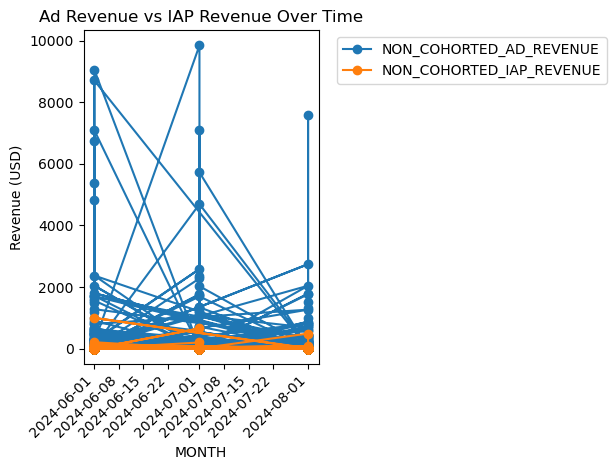

In [27]:
# Cell 6: Revenue Analysis
# Revenue Trends
plt.figure(figsize=(12, 6))
df.plot(x='MONTH', 
        y=['NON_COHORTED_AD_REVENUE', 'NON_COHORTED_IAP_REVENUE'],
        marker='o')
plt.title('Ad Revenue vs IAP Revenue Over Time')
plt.ylabel('Revenue (USD)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

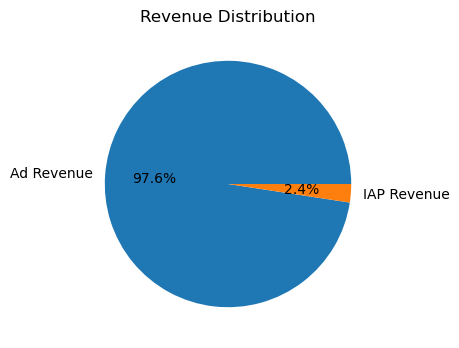

In [29]:
# Revenue Distribution
plt.figure(figsize=(7, 4))
revenue_split = pd.DataFrame({
    'Revenue Type': ['Ad Revenue', 'IAP Revenue'],
    'Amount': [df['NON_COHORTED_AD_REVENUE'].sum(), 
              df['NON_COHORTED_IAP_REVENUE'].sum()]
})
plt.pie(revenue_split['Amount'], labels=revenue_split['Revenue Type'], 
        autopct='%1.1f%%')
plt.title('Revenue Distribution')
plt.show()

In [30]:
# Cell 7: Revenue Metrics
# Calculate revenue metrics
df['Revenue_per_Install'] = (df['NON_COHORTED_AD_REVENUE'] + 
                            df['NON_COHORTED_IAP_REVENUE']) / df['INSTALLS']
df['ARPDAU'] = (df['NON_COHORTED_AD_REVENUE'] + df['NON_COHORTED_IAP_REVENUE']) / df['RETAINED_USERS_D1']

revenue_metrics = pd.DataFrame({
    'Metric': ['Average Revenue per Install', 'ARPDAU'],
    'Value': [df['Revenue_per_Install'].mean(), df['ARPDAU'].mean()]
})
print("Revenue Metrics:")
display(revenue_metrics)

Revenue Metrics:


,Metric,Value
0,Average Revenue per Install,inf
1,ARPDAU,inf


<Figure size 1200x600 with 0 Axes>

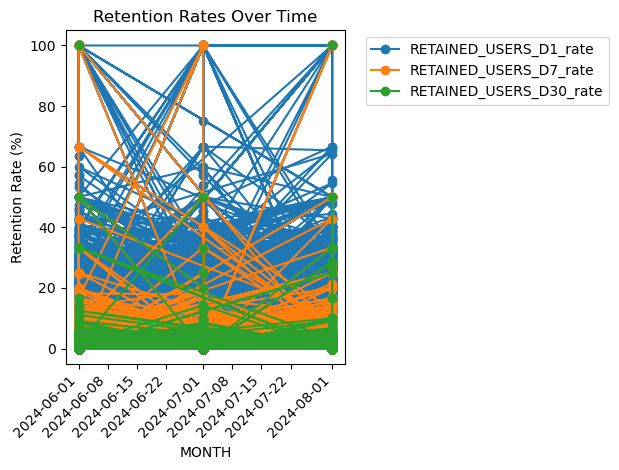

In [31]:
# Cell 8: Retention Analysis
# Retention Rates Over Time
retention_columns = ['RETAINED_USERS_D1', 'RETAINED_USERS_D7', 'RETAINED_USERS_D30']
for column in retention_columns:
    df[f'{column}_rate'] = df[column] / df['INSTALLS'] * 100

plt.figure(figsize=(12, 6))
df.plot(x='MONTH', 
        y=[f'{col}_rate' for col in retention_columns],
        marker='o')
plt.title('Retention Rates Over Time')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [32]:
# Average Retention Rates
avg_retention = pd.DataFrame({
    'Day': ['D1', 'D7', 'D30'],
    'Rate': [df['RETAINED_USERS_D1_rate'].mean(),
             df['RETAINED_USERS_D7_rate'].mean(),
             df['RETAINED_USERS_D30_rate'].mean()]
})
print("\nAverage Retention Rates:")
display(avg_retention)


Average Retention Rates:


,Day,Rate
0,D1,22.054274
1,D7,4.513052
2,D30,1.098558


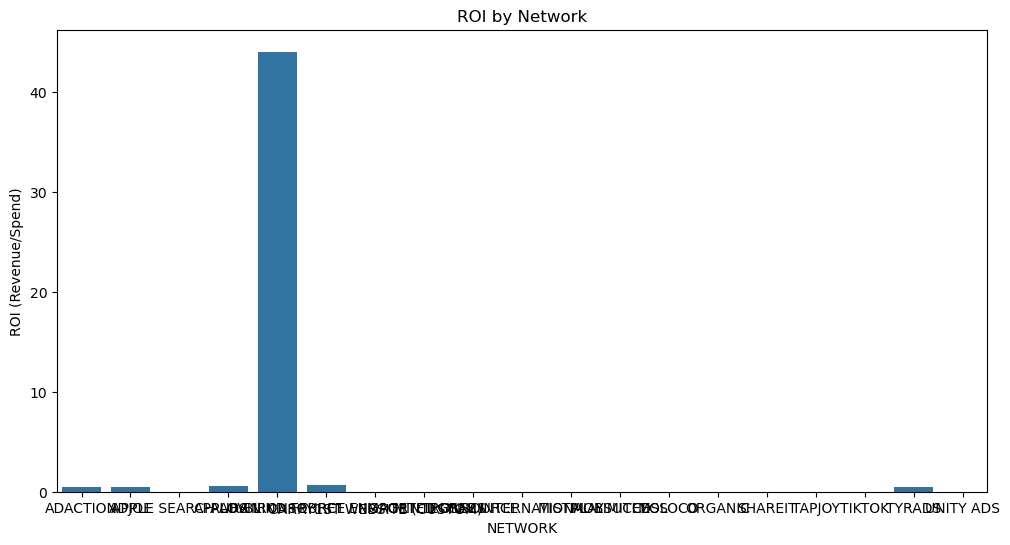


Network Performance Metrics:


,NETWORK,UA_SPEND,INSTALLS,NON_COHORTED_AD_REVENUE,NON_COHORTED_IAP_REVENUE,ROI
0,ADACTION,88913.8000,52549,40580.7939,703.199390,0.464315
1,ADJOE,121356.9150,210486,61372.1262,352.310125,0.508619
2,APPLE SEARCH ADS,0.0000,1,1.1889,0.000000,inf
3,APPLOVIN,92719.6938,182060,55432.3962,686.848620,0.605257
4,AURA IRONSOURCE,13.9469,117,614.5996,0.000000,44.067112
5,BLIND FERRET ENGAGE,20310.5000,5490,14192.6035,320.283825,0.714551
6,CARRY1ST WEBSITE (CUSTOM),0.0000,11,15.2687,0.000000,inf
7,IMPORTED USERS,0.0000,0,3996.5371,169.999150,inf
8,IRONSOURCE,0.0000,0,12.2719,0.000000,inf
9,MINTEGRAL INTERNATIONAL LIMITED,0.0000,0,19.2801,0.000000,inf


In [34]:
# Cell 9: Network Analysis
network_metrics = df.groupby('NETWORK').agg({
    'UA_SPEND': 'sum',
    'INSTALLS': 'sum',
    'NON_COHORTED_AD_REVENUE': 'sum',
    'NON_COHORTED_IAP_REVENUE': 'sum'
}).reset_index()

network_metrics['ROI'] = ((network_metrics['NON_COHORTED_AD_REVENUE'] + 
                          network_metrics['NON_COHORTED_IAP_REVENUE']) / 
                         network_metrics['UA_SPEND'])

plt.figure(figsize=(12, 6))
sns.barplot(x='NETWORK', y='ROI', data=network_metrics)
plt.title('ROI by Network')
plt.ylabel('ROI (Revenue/Spend)')
plt.show()

print("\nNetwork Performance Metrics:")
display(network_metrics)

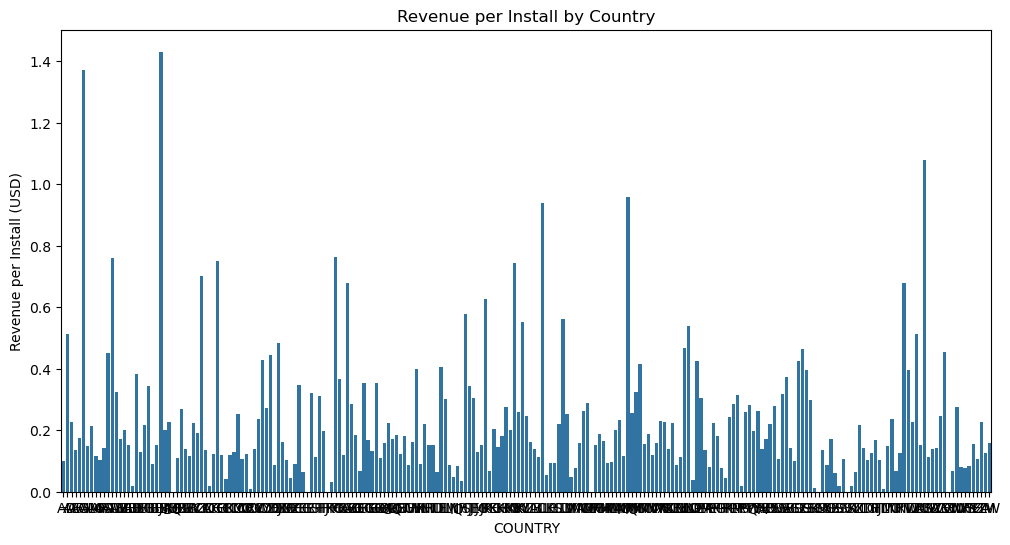


Country Performance Metrics:


,COUNTRY,INSTALLS,NON_COHORTED_AD_REVENUE,NON_COHORTED_IAP_REVENUE,UA_SPEND,Revenue_per_Install,ROI
0,--,223,22.4263,0.000000,0.0000,0.100566,inf
1,AD,6,3.0702,0.000000,1.8000,0.511700,1.705667
2,AE,1918,429.0989,2.774825,744.5396,0.225169,0.580055
3,AF,326,44.2643,0.000000,90.0000,0.135780,0.491826
4,AG,20,3.4995,0.000000,5.7000,0.174975,0.613947
...,...,...,...,...,...,...,...
224,YE,59,9.1845,0.000000,23.7000,0.155669,0.387532
225,YT,3,0.3163,0.000000,0.0000,0.105433,inf
226,ZA,2195,492.5819,5.537920,348.7099,0.226934,1.428465
227,ZM,1485,183.1361,1.691500,435.3000,0.124463,0.424598


In [35]:
# Cell 10: Country Analysis
country_metrics = df.groupby('COUNTRY').agg({
    'INSTALLS': 'sum',
    'NON_COHORTED_AD_REVENUE': 'sum',
    'NON_COHORTED_IAP_REVENUE': 'sum',
    'UA_SPEND': 'sum'
}).reset_index()

country_metrics['Revenue_per_Install'] = ((country_metrics['NON_COHORTED_AD_REVENUE'] + 
                                         country_metrics['NON_COHORTED_IAP_REVENUE']) / 
                                        country_metrics['INSTALLS'])
country_metrics['ROI'] = ((country_metrics['NON_COHORTED_AD_REVENUE'] + 
                          country_metrics['NON_COHORTED_IAP_REVENUE']) / 
                         country_metrics['UA_SPEND'])

plt.figure(figsize=(12, 6))
sns.barplot(x='COUNTRY', y='Revenue_per_Install', data=country_metrics)
plt.title('Revenue per Install by Country')
plt.ylabel('Revenue per Install (USD)')
plt.show()

print("\nCountry Performance Metrics:")
display(country_metrics)

In [36]:
# Cell 11: Overall KPIs
def calculate_kpis(df):
    kpis = {
        'Average CPI': df['UA_SPEND'].sum() / df['INSTALLS'].sum(),
        'Overall ROI': (df['NON_COHORTED_AD_REVENUE'].sum() + 
                       df['NON_COHORTED_IAP_REVENUE'].sum()) / df['UA_SPEND'].sum(),
        'Average Revenue per User': (df['NON_COHORTED_AD_REVENUE'].sum() + 
                                   df['NON_COHORTED_IAP_REVENUE'].sum()) / df['INSTALLS'].sum(),
        'Ad Revenue Share': (df['NON_COHORTED_AD_REVENUE'].sum() / 
                           (df['NON_COHORTED_AD_REVENUE'].sum() + 
                            df['NON_COHORTED_IAP_REVENUE'].sum()) * 100),
        'Average D1 Retention': (df['RETAINED_USERS_D1'].mean() / df['INSTALLS'].mean() * 100),
        'Average D7 Retention': (df['RETAINED_USERS_D7'].mean() / df['INSTALLS'].mean() * 100),

        'Average D30 Retention': (df['RETAINED_USERS_D30'].mean() / df['INSTALLS'].mean() * 100)
    }
    
    return pd.DataFrame(kpis.items(), columns=['Metric', 'Value'])

print("Key Performance Indicators:")
display(calculate_kpis(df))

Key Performance Indicators:


,Metric,Value
0,Average CPI,0.677240
1,Overall ROI,0.604584
2,Average Revenue per User,0.409448
3,Ad Revenue Share,97.592194
4,Average D1 Retention,24.666990
5,Average D7 Retention,5.017939
6,Average D30 Retention,1.232985


In [ ]:
# Basic time series analysis: Monthly installs trend
monthly_installs = data.groupby('MONTH')['INSTALLS'].sum()
plt.figure(figsize=(12, 6))
monthly_installs.plot()
plt.title("Monthly Installs Trend")
plt.xlabel("Month")
plt.ylabel("Installs")
plt.show()

In [ ]:
# User Acquisition Spend vs. Installs by Network
plt.figure(figsize=(12, 6))
sns.scatterplot(x='UA_SPEND', y='INSTALLS', hue='NETWORK', data=data)
plt.title("UA Spend vs Installs by Network")
plt.xlabel("UA Spend")
plt.ylabel("Installs")
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Retention rate analysis for D1, D7, and D30
retention_data = data[['RETAINED_USERS_D1', 'RETAINED_USERS_D7', 'RETAINED_USERS_D30']].mean()
plt.figure(figsize=(8, 4))
retention_data.plot(kind='bar')
plt.title("Average Retention Rates (D1, D7, D30)")
plt.xlabel("Retention Day")
plt.ylabel("Average Retained Users")
plt.show()
